In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

In [3]:
# Load data
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target
df['diagnosis'] = df['target'].map({0: 'Malignant', 1: 'Benign'})
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,diagnosis
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,Malignant
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,Malignant
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,Malignant


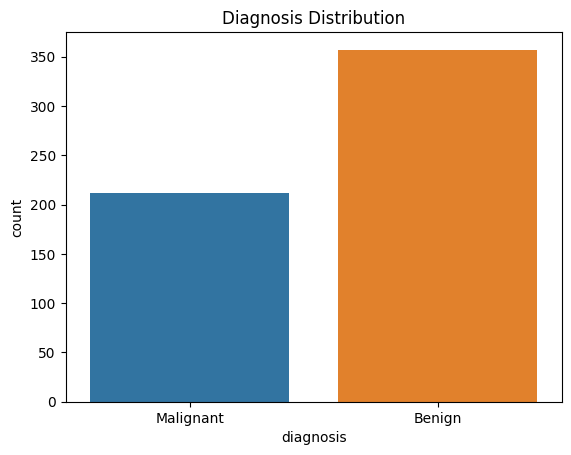

In [4]:
sns.countplot(data=df, x='diagnosis')
plt.title("Diagnosis Distribution")
plt.show()

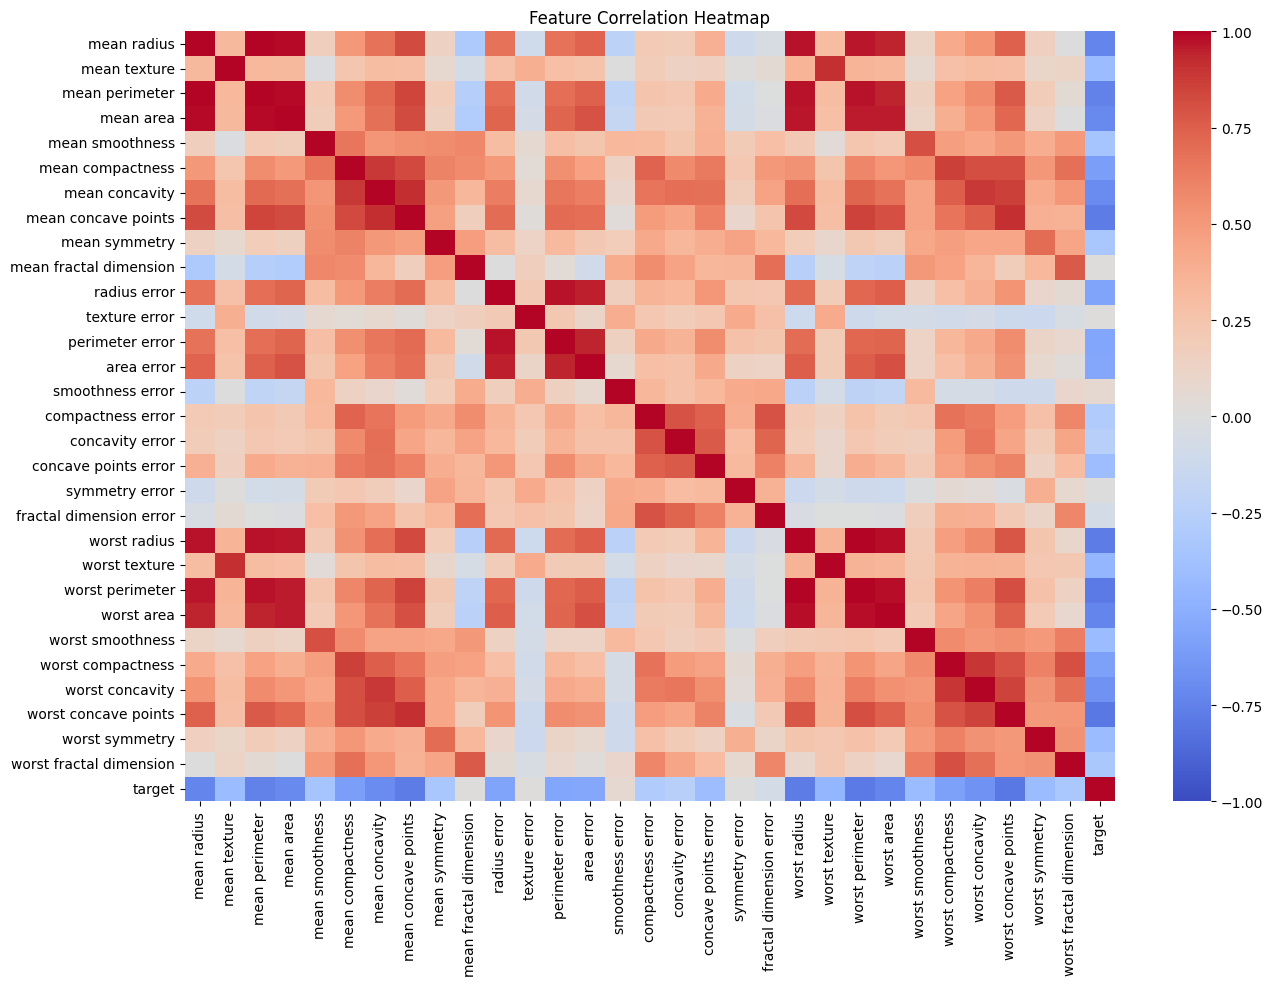

In [5]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Feature Correlation Heatmap")
plt.show()

In [6]:
X = df.drop(['target', 'diagnosis'], axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
rf = RandomForestClassifier(random_state=42)

# Hyperparameter tuning
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

In [8]:
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_
rf_pred = rf_best.predict(X_test)

In [9]:
print("Random Forest Best Params:", rf_grid.best_params_)
print("RF Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

Random Forest Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
RF Accuracy: 0.9649122807017544
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [11]:
xgb = XGBClassifier(random_state=42, eval_metric='logloss')

In [13]:
# Hyperparameter tuning
xgb_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2]
}

In [14]:
xgb_grid = GridSearchCV(xgb, xgb_params, cv=5, scoring='accuracy')
xgb_grid.fit(X_train, y_train)
xgb_best = xgb_grid.best_estimator_
xgb_pred = xgb_best.predict(X_test)

In [15]:
print("XGBoost Best Params:", xgb_grid.best_params_)
print("XGB Accuracy:", accuracy_score(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))

XGBoost Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
XGB Accuracy: 0.956140350877193
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



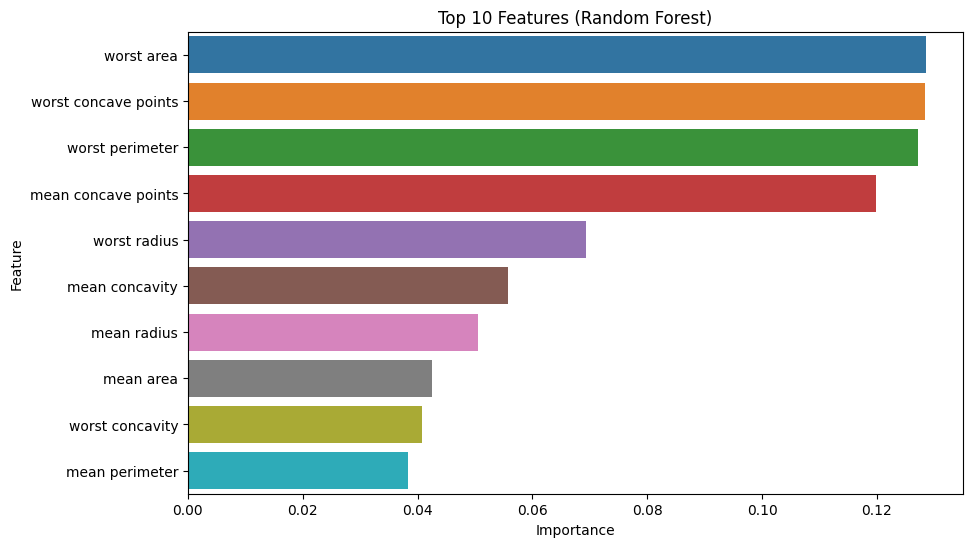

In [16]:
rf_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_best.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=rf_importance.head(10), x='Importance', y='Feature')
plt.title("Top 10 Features (Random Forest)")
plt.show()

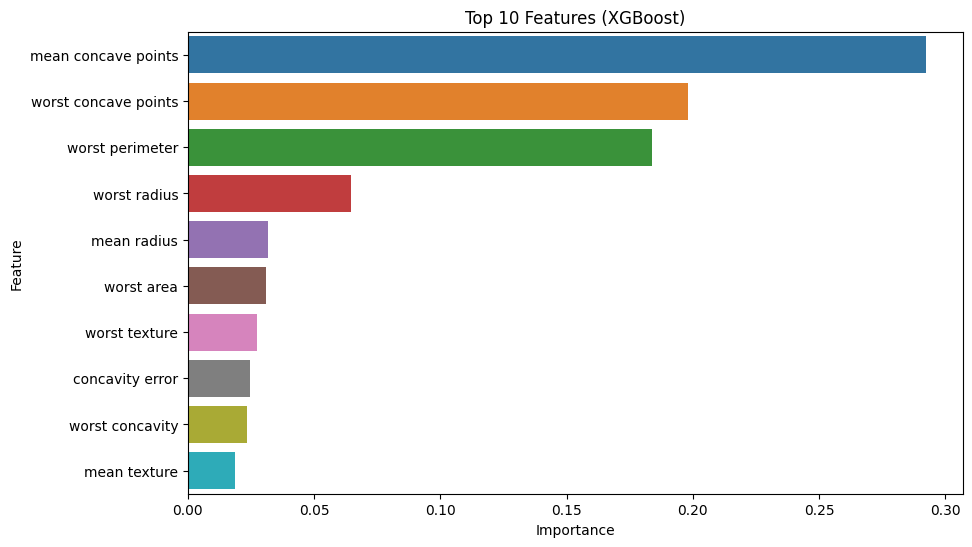

In [17]:
xgb_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_best.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=xgb_importance.head(10), x='Importance', y='Feature')
plt.title("Top 10 Features (XGBoost)")
plt.show()

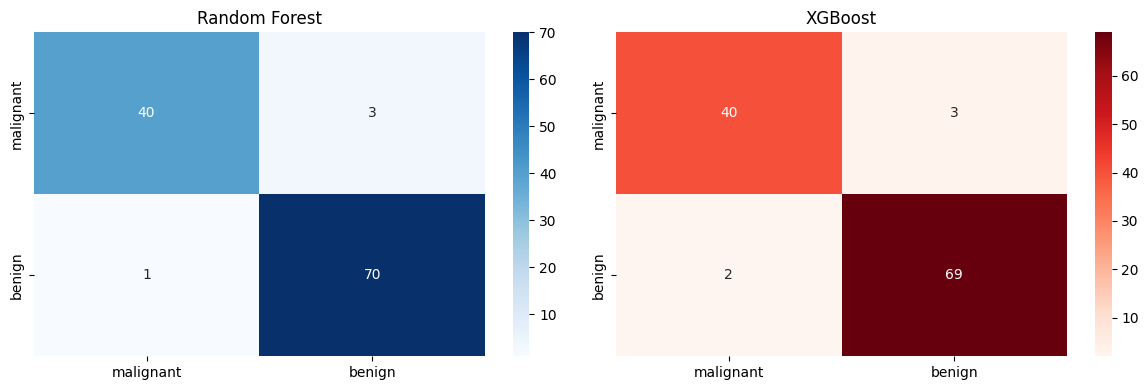

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Random Forest
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', cmap='Blues', 
            xticklabels=cancer.target_names, yticklabels=cancer.target_names, ax=axes[0])
axes[0].set_title("Random Forest")

# XGBoost
sns.heatmap(confusion_matrix(y_test, xgb_pred), annot=True, fmt='d', cmap='Reds',
            xticklabels=cancer.target_names, yticklabels=cancer.target_names, ax=axes[1])
axes[1].set_title("XGBoost")

plt.tight_layout()
plt.show()